# Audio Processing and Data Handling

## 1.1 Install Required Packages

In [86]:
%pip install librosa seaborn matplotlib tqdm numpy noisereduce IPython

Note: you may need to restart the kernel to use updated packages.


## 1.2 Import Required Dependencies

In [91]:
# import dependecies
import librosa
import seaborn as sns
import numpy as np
import os
import IPython
import noisereduce as nr
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import librosa.display
from collections import Counter
from tqdm import tqdm
from noisereduce.generate_noise import band_limited_noise
%matplotlib inline

## 1.3 Data Visualisation

In [50]:
# Set directory path with dataset
#dataset_path = r'C:\Users\ssr2801\birdproject\data_for_code_new'
dataset_path = r'C:\Users\ssr2801\Bird\data_for_code_new'

In [51]:
# function to return bird name from first index with dot seperation
def extract_bird_class(bird_name):
    return bird_name.split('.')[0]

In [52]:
# Visualise bird classes with bar graph
def plot_bird_class_counts(bird_class_counts):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))
    ax=sns.barplot(x=list(bird_class_counts.keys()), y=list(bird_class_counts.values()))
    plt.title('Number of Bird Classes in Dataset')
    plt.xticks(rotation=75)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=12)
    plt.xlabel('Bird Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [53]:
# Function for calculating statistical summary

def calculate_statistics(class_counts):
    count_values=list(class_counts.values())
    sum_count=sum(count_values)
    mean_count=sum(count_values)/len(count_values)
    max_count=max(count_values)
    min_count=min(count_values)
    return sum_count, mean_count, max_count, min_count

In [54]:
# list of folder to loop into all subfolders for wav files
folders = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10',
           'fold11', 'fold12', 'fold13', 'fold14', 'fold15', 'fold16', 'fold17', 'fold18', 'fold19',
           'fold20', 'fold21', 'fold22', 'fold23', 'fold24', 'fold25', 'fold26', 'fold27', 'fold28', 
           'fold29', 'fold30', 'fold31', 'fold32', 'fold33', 'fold34', 'fold35', 'fold36', 'fold37',
           'fold38', 'fold39', 'fold40', 'fold41', 'fold42', 'fold43', 'fold44', 'fold45', 'fold46']

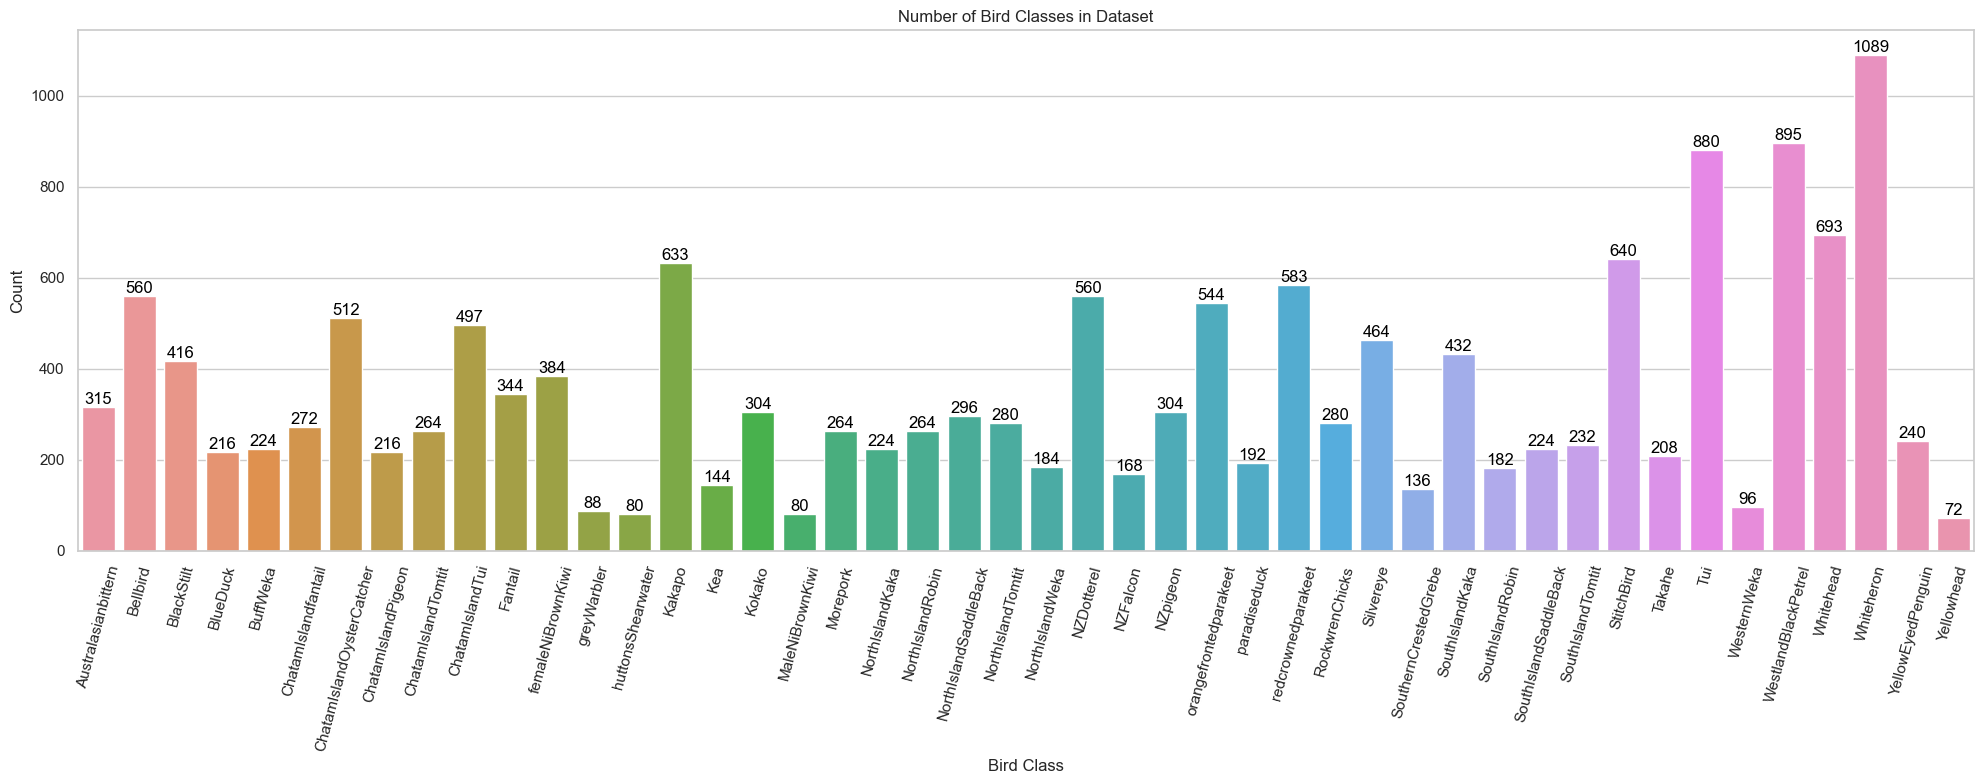

In [55]:
# counter for each bird subfolder
bird_class_counts = Counter()

# Iterate through each bird class and name
for folds in folders:
    folder_path=f'{dataset_path}/{folds}'
    wav_files=librosa.util.find_files(folder_path, ext='wav')
    bird_classes=[extract_bird_class(os.path.basename(file)) for file in wav_files]
    bird_class_counts.update(bird_classes)

plot_bird_class_counts(bird_class_counts)

In [56]:
# Statistical summary
sum_count, mean_count, max_count, min_count = calculate_statistics(bird_class_counts)

print(f"[Total]: {sum_count}")
print(f"[Mean]: {mean_count:.2f}")
print(f"[Max]: {max_count}")
print(f"[Min]: {min_count}")

[Total]: 16175
[Mean]: 351.63
[Max]: 1089
[Min]: 72


We have a highly imbalance data. The statistical analysis, we can see our average number of bird in each class is around 305 ish, 880 for max, and 72 for min. Imblearn library is a highly popular tools to combat imbalance dataset, but will require experimenting to find the most optimal sampling strategy. These strategy involves oversampling a class, undersampling, or utilising both seems the best case here.  

## 1.4 Class Balancing

#Utilise imblearn modules for Synthetic Minority Over-sampling and Random under and over stampler

# Assuming you have X_resampled and y_resampled as shown in the previous response

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Apply RandomUnderSampler for undersampling (optional)
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Print the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

## 2. Check audio quality (Mel-Spectrogram)

In [59]:
# Loop through each folder to check audio quality

# Set path directory
folds = os.listdir(dataset_path)

# Loop through each fold
for fold in tqdm(folds, desc='Progression'):
    folder_path = os.path.join(dataset_path, fold)
    wav_files = librosa.util.find_files(folder_path, ext='wav')
    
    # Loop through each wav file in the folder
    for wav_file in wav_files:
        y, sr = librosa.load(wav_file, sr=None)
        print(f"Sample rate for {wav_file}: {sr} Hz")

Progression:   0%|                                                                              | 0/46 [00:00<?, ?it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.10.wav: 48000 Hz
Sample rat

Progression:   2%|█▌                                                                    | 1/46 [00:00<00:17,  2.62it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.226.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.227.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.228.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.229.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.23.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.230.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.231.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.232.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.233.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.234.wav: 22050 Hz
S

Progression:   4%|███                                                                   | 2/46 [00:00<00:22,  1.94it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.415.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.416.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.417.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.418.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.419.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.42.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.420.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.421.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.422.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.423.wav: 22050 Hz
Sample rate for C:\Users\ssr280

Progression:   7%|████▌                                                                 | 3/46 [00:01<00:19,  2.25it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.261.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.262.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.263.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.264.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.265.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.266.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.267.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.268.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.269.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.27.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.270.wav: 22050 Hz
Sample rate for C:\Use

Progression:   9%|██████                                                                | 4/46 [00:01<00:17,  2.46it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.362.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.363.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.364.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.365.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.366.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.367.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.368.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.369.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.37.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.370.wav: 22050 Hz
Sample rate

Progression:  13%|█████████▏                                                            | 6/46 [00:01<00:09,  4.23it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.22.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.23.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.24.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.25.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.26.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.27.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.28.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.29.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.30.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.31.wav: 22050 Hz
Sample rate for C:\U

Progression:  17%|████████████▏                                                         | 8/46 [00:02<00:10,  3.55it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.90.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.91.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.92.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.93.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.94.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.95.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.96.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.97.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.98.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.99.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for

Progression:  20%|█████████████▋                                                        | 9/46 [00:02<00:10,  3.51it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.37.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.38.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.39.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.40.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.41.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.42.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.43.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.44.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.45.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.46.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.47.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_

Progression:  24%|████████████████▌                                                    | 11/46 [00:03<00:08,  4.34it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.187.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.188.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.189.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.19.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.190.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.191.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.192.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.193.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.194.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.195.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.196.wav: 22050 Hz
Sample rate

Progression:  26%|██████████████████                                                   | 12/46 [00:03<00:10,  3.29it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.63.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.64.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.65.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.66.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.67.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.68.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.69.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.70.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.71.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.72.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.73.wav: 22050 Hz
Sample rate for C:\Users\ssr2801

Progression:  28%|███████████████████▌                                                 | 13/46 [00:03<00:09,  3.52it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.33.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.34.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.35.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.36.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.37.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.38.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.39.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.40.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.41.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.42.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  30%|█████████████████████                                                | 14/46 [00:04<00:08,  3.59it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.230.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.231.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.232.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.233.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.234.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.235.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.236.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.237.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.238.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.239.wav: 22050 Hz
Sample rate for C:\U

Progression:  33%|██████████████████████▌                                              | 15/46 [00:04<00:08,  3.50it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.82.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.83.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.84.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.85.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.86.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.87.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.88.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.89.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.90.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBa

Progression:  35%|████████████████████████                                             | 16/46 [00:04<00:08,  3.48it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.258.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.259.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.26.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.260.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.261.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.262.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.263.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.264.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.265.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.266.wav: 22050 Hz
Sample rate

Progression:  37%|█████████████████████████▌                                           | 17/46 [00:05<00:07,  3.87it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.182.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.183.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.184.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.19.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.20.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.21.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.22.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.23.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.24.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.25.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird

Progression:  39%|███████████████████████████                                          | 18/46 [00:05<00:09,  2.90it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.42.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.420.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.421.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.422.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.423.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.424.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.425.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.426.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.427.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.428.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.429.wav

Progression:  41%|████████████████████████████▌                                        | 19/46 [00:05<00:07,  3.39it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.10.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.100.wav: 22050 Hz
Sample rate for C:\U

Progression:  43%|██████████████████████████████                                       | 20/46 [00:06<00:07,  3.35it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.30.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.300.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.301.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.302.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.303.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.304.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.31.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.32.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.33.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.34.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.35.wav: 48000 Hz
Sample rate for 

Progression:  46%|███████████████████████████████▍                                     | 21/46 [00:06<00:09,  2.69it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.42.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.420.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.421.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.422.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.423.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.424.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.425.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.426.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.427.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefront

Progression:  48%|█████████████████████████████████                                    | 22/46 [00:06<00:07,  3.14it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.10.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradis

Progression:  50%|██████████████████████████████████▌                                  | 23/46 [00:07<00:07,  2.92it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.100.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.101.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.102.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.103.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.104.wav: 22050 Hz
Sampl

Progression:  52%|████████████████████████████████████                                 | 24/46 [00:07<00:08,  2.61it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.636.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.637.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.638.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.639.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.640.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.641.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.642.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.643.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.644.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.645.wav: 22050 Hz


Progression:  54%|█████████████████████████████████████▌                               | 25/46 [00:07<00:07,  2.83it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.25.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.250.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.251.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.252.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.253.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.254.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.255.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.256.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.257.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.258.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\dat

Progression:  57%|███████████████████████████████████████                              | 26/46 [00:08<00:07,  2.60it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.364.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.365.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.366.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.367.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.368.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.369.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.37.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.370.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.371.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.372.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.373.wav: 22050 Hz


Progression:  59%|████████████████████████████████████████▌                            | 27/46 [00:08<00:06,  3.16it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.10.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.100.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.101.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.102.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.103.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.104.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.105.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.1

Progression:  61%|██████████████████████████████████████████                           | 28/46 [00:09<00:06,  2.83it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.376.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.377.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.378.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.379.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.38.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.380.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.381.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.382.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.383.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.384.wav: 22050 Hz
Sample rate for C:\Users\ssr280

Progression:  63%|███████████████████████████████████████████▌                         | 29/46 [00:09<00:05,  3.28it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.150.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.151.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.152.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.153.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.154.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.155.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.156.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.157.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.158.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.159.wav: 22050 Hz
Sample rate for C:\U

Progression:  65%|█████████████████████████████████████████████                        | 30/46 [00:09<00:04,  3.57it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.139.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.14.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.140.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.141.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.142.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.143.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.144.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.145.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.146.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIsland

Progression:  67%|██████████████████████████████████████████████▌                      | 31/46 [00:09<00:04,  3.72it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.10.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.100.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.101.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.102.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.103.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.104.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.105.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.106.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.107.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.108.wav: 22050 Hz
Sample rate

Progression:  70%|████████████████████████████████████████████████                     | 32/46 [00:10<00:05,  2.64it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.97.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.98.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.99.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.08.wav: 48000 Hz
Sample rate for C:\Users\ssr280

Progression:  72%|█████████████████████████████████████████████████▌                   | 33/46 [00:10<00:04,  3.05it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.99.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.08.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.09.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.10.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\

Progression:  74%|███████████████████████████████████████████████████                  | 34/46 [00:10<00:03,  3.37it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.91.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.92.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.93.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.94.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.95.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.96.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.97.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.98.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.99.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  76%|████████████████████████████████████████████████████▌                | 35/46 [00:11<00:05,  2.12it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.88.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.880.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.89.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.90.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.91.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.92.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.93.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.94.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.95.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.96.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.97.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.98.wav: 

Progression:  80%|███████████████████████████████████████████████████████▌             | 37/46 [00:12<00:03,  2.32it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.779.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.780.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.781.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.782.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.783.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.784.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.785.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.786.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.787.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.788.wav:

Progression:  83%|█████████████████████████████████████████████████████████            | 38/46 [00:13<00:03,  2.04it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.77.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.78.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.79.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.81.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.82.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.83.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.84.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.85.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.86.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.88.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.89.wav: 48000 Hz
Sample rat

Progression:  85%|██████████████████████████████████████████████████████████▌          | 39/46 [00:14<00:04,  1.53it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.877.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.878.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.879.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.880.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.881.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.882.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.883.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.884.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.885.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.886.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.887.wa

Progression:  87%|████████████████████████████████████████████████████████████         | 40/46 [00:14<00:03,  1.79it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.97.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.98.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.99.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.01.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.02.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.03.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.04.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.05.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.06.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.07.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellow

Progression:  91%|██████████████████████████████████████████████████████████████▉      | 42/46 [00:14<00:01,  2.63it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.186.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.187.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.188.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.189.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.19.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.190.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.191.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.192.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.193.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.194.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.195.wav: 22050 Hz
Sample rate for C:\Use

Progression:  93%|████████████████████████████████████████████████████████████████▌    | 43/46 [00:15<00:01,  2.79it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.161.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.162.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.163.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.164.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.165.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.166.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.167.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.168.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.169.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.17.wav: 48000 Hz
S

Progression:  96%|██████████████████████████████████████████████████████████████████   | 44/46 [00:15<00:00,  2.47it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.442.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.443.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.444.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.445.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.446.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.447.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.448.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.449.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.45.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_

Progression:  98%|███████████████████████████████████████████████████████████████████▌ | 45/46 [00:15<00:00,  2.75it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.13.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.130.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.131.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.132.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.133.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.134.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.135.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.136.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.137.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.138.wav: 22050 Hz
Sample rate

Progression: 100%|█████████████████████████████████████████████████████████████████████| 46/46 [00:16<00:00,  2.85it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.258.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.259.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.26.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.260.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.261.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.262.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.263.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.264.wav: 22050 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.27.wav: 48000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.28.wav: 48000 Hz
Sample rate f

As we can see, the sample rates are either 48000 and 22050 after we performed data augmentations. To allow more consistent yield, the sample rate will be loaded changed for more consistency. By calculating the middle ground between 48000 and 22050 sample rates ([48000+22050] / 2) = 35,025, which is still high. Tensorflow recommends sample rate of 16000 as the quality of the audio is not too affect for deep learning models, where larger sample rate only increases the computational processes and memory. So in this case, 16kHz sample rate will be choosen. 

In [60]:
# Audio path of a sample
sample = r'C:\Users\ssr2801\birdproject\data_for_code_new\fold1\Australasianbittern.01.wav'

In [61]:
ipd.Audio(sample)

In [62]:
# Loop through each folder to check audio quality

# Set path directory 
folds = os.listdir(dataset_path)

# Loop through each fold
for fold in tqdm(folds, desc='Progression'):
    folder_path = os.path.join(dataset_path, fold)
    wav_files = librosa.util.find_files(folder_path, ext='wav')
    
    # Loop through each wav file in the folder
    for wav_file in wav_files:
        y, sr = librosa.load(wav_file, sr=16000)
        print(f"Sample rate for {wav_file}: {sr} Hz")

Progression:   0%|                                                                              | 0/46 [00:00<?, ?it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.03.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.04.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.05.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.06.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.07.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.08.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.09.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.10.wav: 16000 Hz
Sample rat

Progression:   2%|█▌                                                                    | 1/46 [00:01<00:46,  1.04s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.99.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.03.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.04.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.05.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.06.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.07.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.08.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.09.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird

Progression:   4%|███                                                                   | 2/46 [00:02<00:59,  1.34s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.74.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold10\ChatamIslandTui.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:   7%|████▌                                                                 | 3/46 [00:03<00:53,  1.25s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.42.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.43.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.44.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.45.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.51.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold11\Fantail.52.wav: 16000 Hz
Sample rate for C:\Users\ssr2801

Progression:   9%|██████                                                                | 4/46 [00:04<00:52,  1.24s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.39.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.40.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.41.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.42.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.43.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.44.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.45.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold12\femaleNiBrownKiwi.48.wav: 16000 Hz
Sample rate for C:\U

Progression:  11%|███████▌                                                              | 5/46 [00:05<00:37,  1.10it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold13\greyWarbler.65.wa

Progression:  13%|█████████▏                                                            | 6/46 [00:05<00:27,  1.43it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.23.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.24.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.25.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.26.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.27.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.28.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.29.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.30.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.31.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold14\huttonsShearwater.32.wav: 16000 Hz
Sample rate for C:\U

Progression:  15%|██████████▋                                                           | 7/46 [00:07<00:44,  1.13s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.77.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.78.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.79.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.80(1).wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold15\Kakapo.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  17%|████████████▏                                                         | 8/46 [00:08<00:34,  1.10it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.51.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.52.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.53.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold16\Kea.60.wav: 1

Progression:  20%|█████████████▋                                                        | 9/46 [00:09<00:34,  1.06it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.74.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold17\Kokako.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_

Progression:  22%|███████████████                                                      | 10/46 [00:09<00:26,  1.38it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.29.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.30.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.31.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.32.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.33.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.34.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.35.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.36.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.37.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold18\MaleNiBrownKiwi.38.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  24%|████████████████▌                                                    | 11/46 [00:10<00:26,  1.33it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.51.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.52.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.53.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold19\Morepork.57.wav: 16000 Hz
Sample rate for C:\Us

Progression:  26%|██████████████████                                                   | 12/46 [00:11<00:36,  1.06s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.85.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.86.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.87.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.88.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.89.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold2\Bellbird.90.wav: 16000 Hz
Sample rate for C:\Users\ssr2801

Progression:  28%|███████████████████▌                                                 | 13/46 [00:12<00:31,  1.06it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold20\NorthIslandKaka.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  30%|█████████████████████                                                | 14/46 [00:13<00:29,  1.09it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.77.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.78.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.79.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold21\NorthIslandRobin.84.wav: 16000 Hz
Sample rate for C:\Users\ssr28

Progression:  33%|██████████████████████▌                                              | 15/46 [00:14<00:28,  1.07it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.98.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold22\NorthIslandSaddleBack.99.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.03.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.04.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.05.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.06.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.07.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.08.wav: 16000 Hz
Sample rate 

Progression:  35%|████████████████████████                                             | 16/46 [00:15<00:27,  1.08it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.85.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.86.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.87.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.88.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.89.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold23\NorthIslandTomtit.90.wav: 16000 Hz
Sample rate for C:\U

Progression:  37%|█████████████████████████▌                                           | 17/46 [00:15<00:24,  1.20it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.96.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.97.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.98.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold24\NorthIslandWeka.99.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.03.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.04.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.05.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.06.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotte

Progression:  39%|███████████████████████████                                          | 18/46 [00:17<00:30,  1.10s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.74.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold25\NZDotterel.76.wav: 16000 Hz

Progression:  41%|████████████████████████████▌                                        | 19/46 [00:18<00:25,  1.07it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.24.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.25.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.26.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.27.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.28.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.29.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.30.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.31.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.32.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.33.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold26\NZFalcon.34.wav: 16000 Hz
Sample rate for C:\Us

Progression:  43%|██████████████████████████████                                       | 20/46 [00:19<00:24,  1.07it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold27\NZpigeon.64.wav: 16000 Hz
Sample rate for C:\Us

Progression:  46%|███████████████████████████████▍                                     | 21/46 [00:20<00:28,  1.15s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparakeet.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold28\orangefrontedparake

Progression:  48%|█████████████████████████████████                                    | 22/46 [00:21<00:23,  1.00it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradiseduck.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold29\paradis

Progression:  50%|██████████████████████████████████▌                                  | 23/46 [00:22<00:25,  1.09s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.416.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.42.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.43.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.44.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.45.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold3\BlackStilt.51.wav: 16000 Hz
Sample ra

Progression:  52%|████████████████████████████████████                                 | 24/46 [00:24<00:28,  1.29s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.87.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.88.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.89.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.90.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.91.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.92.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.93.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.94.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.95.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold30\redcrownedparakeet.96.wav: 16000 Hz
Sample rat

Progression:  54%|█████████████████████████████████████▌                               | 25/46 [00:25<00:24,  1.15s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.91.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.92.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.93.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.94.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.95.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.96.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.97.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.98.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold31\RockwrenChicks.99.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new

Progression:  57%|███████████████████████████████████████                              | 26/46 [00:26<00:24,  1.23s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.460.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.461.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.462.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.463.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.464.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold32\Silvereye.51.wav: 16000 Hz
Sampl

Progression:  59%|████████████████████████████████████████▌                            | 27/46 [00:27<00:18,  1.01it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.24.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.25.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.26.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.27.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.28.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.29.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.30.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.31.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.32.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold33\SouthernCrestedGrebe.33.wav:

Progression:  61%|██████████████████████████████████████████                           | 28/46 [00:28<00:19,  1.10s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold34\SouthIslandKaka.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\da

Progression:  63%|███████████████████████████████████████████▌                         | 29/46 [00:29<00:16,  1.06it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.85.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.86.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.87.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.88.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold35\SouthIslandRobin.89.wav: 16000 Hz
Sample rate for C:\Users\ssr28

Progression:  65%|█████████████████████████████████████████████                        | 30/46 [00:29<00:13,  1.16it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.53.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBack.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold36\SouthIslandSaddleBa

Progression:  67%|██████████████████████████████████████████████▌                      | 31/46 [00:30<00:12,  1.20it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.74.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.77.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.78.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.79.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold37\SouthIslandTomtit.80.wav: 16000 Hz
Sample rate for C:\U

Progression:  70%|████████████████████████████████████████████████                     | 32/46 [00:32<00:16,  1.21s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.79.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.85.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.86.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.87.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.88.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold38\StitchBird.89.wav: 16000 Hz

Progression:  72%|█████████████████████████████████████████████████▌                   | 33/46 [00:33<00:13,  1.06s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.74.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.75.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold39\Takahe.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_

Progression:  74%|███████████████████████████████████████████████████                  | 34/46 [00:33<00:11,  1.07it/s]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.39.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.40.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.41.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.42.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.43.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.44.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.45.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold4\BlueDuck.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801

Progression:  76%|████████████████████████████████████████████████████▌                | 35/46 [00:36<00:16,  1.48s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.855.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.856.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.857.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.858.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.859.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.86.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.860.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.861.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.862.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.863.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui.864.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold40\Tui

Progression:  78%|██████████████████████████████████████████████████████               | 36/46 [00:36<00:11,  1.13s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.76.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.77.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.78.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.79.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.80.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.81.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.82.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.83.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.84.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.85.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold41\WesternWeka.86.wa

Progression:  80%|███████████████████████████████████████████████████████▌             | 37/46 [00:39<00:14,  1.61s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.978.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.979.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.980.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.981.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.982.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.983.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.984.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.985.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.986.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold42\WestlandBlackPetrel.987.wav:

Progression:  83%|█████████████████████████████████████████████████████████            | 38/46 [00:41<00:14,  1.77s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.703.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.704.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.705.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.706.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.707.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.708.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.709.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.710.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.711.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold43\Whitehead.712.wav: 16000 Hz


Progression:  85%|██████████████████████████████████████████████████████████▌          | 39/46 [00:45<00:15,  2.26s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.959.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.96.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.960.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.961.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.962.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.963.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.964.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.965.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.966.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.967.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold44\Whiteheron.968.wav

Progression:  87%|████████████████████████████████████████████████████████████         | 40/46 [00:46<00:11,  1.84s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.46.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.47.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.48.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.49.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.50.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.51.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.52.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.53.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold45\YellowEyedPenguin.55.wav: 16000 Hz
Sample rate for C:\U

Progression:  89%|█████████████████████████████████████████████████████████████▌       | 41/46 [00:46<00:06,  1.37s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold46\Yellowhead.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.03.wav: 16000 Hz
Sample r

Progression:  91%|██████████████████████████████████████████████████████████████▉      | 42/46 [00:47<00:04,  1.21s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.96.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.97.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.98.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold5\BuffWeka.99.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.01.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.02.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.03.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.04.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.05.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.06.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_ne

Progression:  93%|████████████████████████████████████████████████████████████████▌    | 43/46 [00:48<00:03,  1.14s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.51.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.52.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.53.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.54.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold6\ChatamIslandfantail.60.wav: 16000 Hz
Sample rat

Progression:  96%|██████████████████████████████████████████████████████████████████   | 44/46 [00:49<00:02,  1.27s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.67.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.68.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.69.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.70.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.71.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.72.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold7\ChatamIslandOysterCatcher.73.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new

Progression:  98%|███████████████████████████████████████████████████████████████████▌ | 45/46 [00:50<00:01,  1.09s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.55.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.56.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.57.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold8\ChatamIslandPigeon.64.wav: 16000 Hz
Sample rate for C:\U

Progression: 100%|█████████████████████████████████████████████████████████████████████| 46/46 [00:51<00:00,  1.11s/it]

Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.58.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.59.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.60.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.61.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.62.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.63.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.64.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.65.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.66.wav: 16000 Hz
Sample rate for C:\Users\ssr2801\Bird\data_for_code_new\fold9\ChatamIslandTomtit.67.wav: 16000 Hz
Sample rate for C:\U

In [63]:
# Check example sample rate as 16 kHz
ipd.Audio(sample)

In [64]:
# Validate sample rate of 16000
print(sr)

16000


- As we are gonna work with Mel-Spectrogram, the sample rate varying should not be a big concern.

In [65]:
# Wav audio signal shape 
y.shape

(48000,)

In [66]:
# Double check audio's length in seconds
48000/sr

3.0

## 2.2 Noise reduction On Background Birds

There are some audios that have background noises of other birds. One prominent example is for the Australalsian Bitten audio clips. This specific bird species have a distinct low frequency call which is compromised by high pitch of other birds in the background. To tackle this problem, a python library noisereduce will be used. First we work with a spectrogram first on the audios and then convert the reduced audio into a seperate folder.

In [71]:
# Declare audio path of sample
austra_sample = r'C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.04.wav'
austra_samplelouder = r'C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.05.wav'

In [80]:
# Load audio signal using librosa
austrabittern4, sr = librosa.load(austra_sample_path, sr=16000)
austrabittern5, sr = librosa.load(austra_samplelouder_path, sr=16000)

In [81]:
# Apply non-stationary noise reduction
reduced_noise = nr.reduce_noise(y = austrabittern4, 
                                sr=sr, 
                                thresh_n_mult_nonstationary=2,
                                stationary=False)

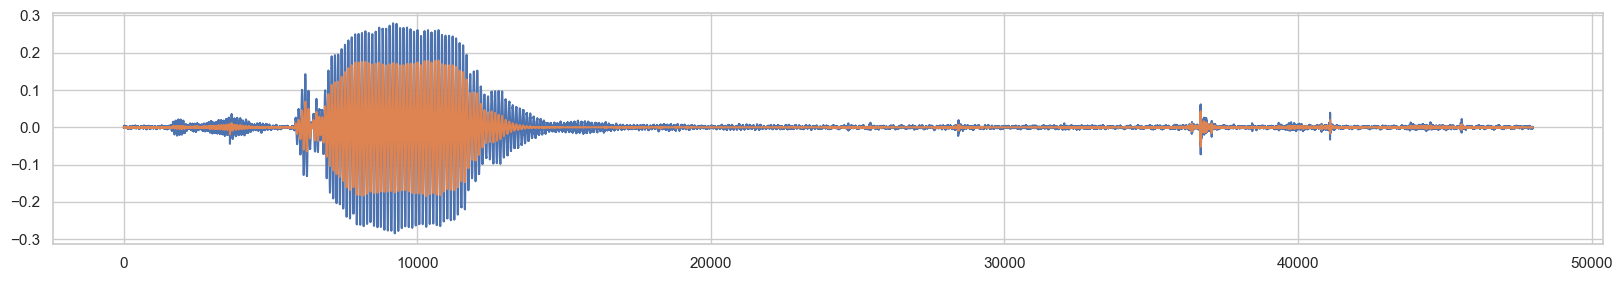

In [95]:
# Hear sample audio and plot audio signal
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(austrabittern4)
ax.plot(reduced_noise, alpha = 1)
IPython.display.Audio(data=reduced_noise, rate=sr)

In [96]:
S_db = librosa.power_to_db(spectrogram, ref=np.max)

NameError: name 'spectrogram' is not defined

In [ ]:
for spectrogram, S_db, bird_folder, bird_name, bird_num in spectrograms:
    plt.figure(figsize=(12,4))
    image = librosa.display.specshow(M_db,        
                                     x_axis="time",
                                     y_axis="mel",
                                     sr=sr)
    plt.title(f"{bird_name} / {bird_num} ({bird_folder})")
    plt.colorbar(format="%2.f dB") 
    plt.show()

## 2.1 Mel Filter Banks

In [74]:
#Declare Mel-Spectrogram features. # fft = 2048, sample rate to respective rate, and mel bands = 177 (max)
filter_banks = librosa.filters.mel(n_fft=2048 , sr=16000 , n_mels= 177)

In [20]:
#Num of Mel bands, Number of fft 
filter_banks.shape

(177, 1025)

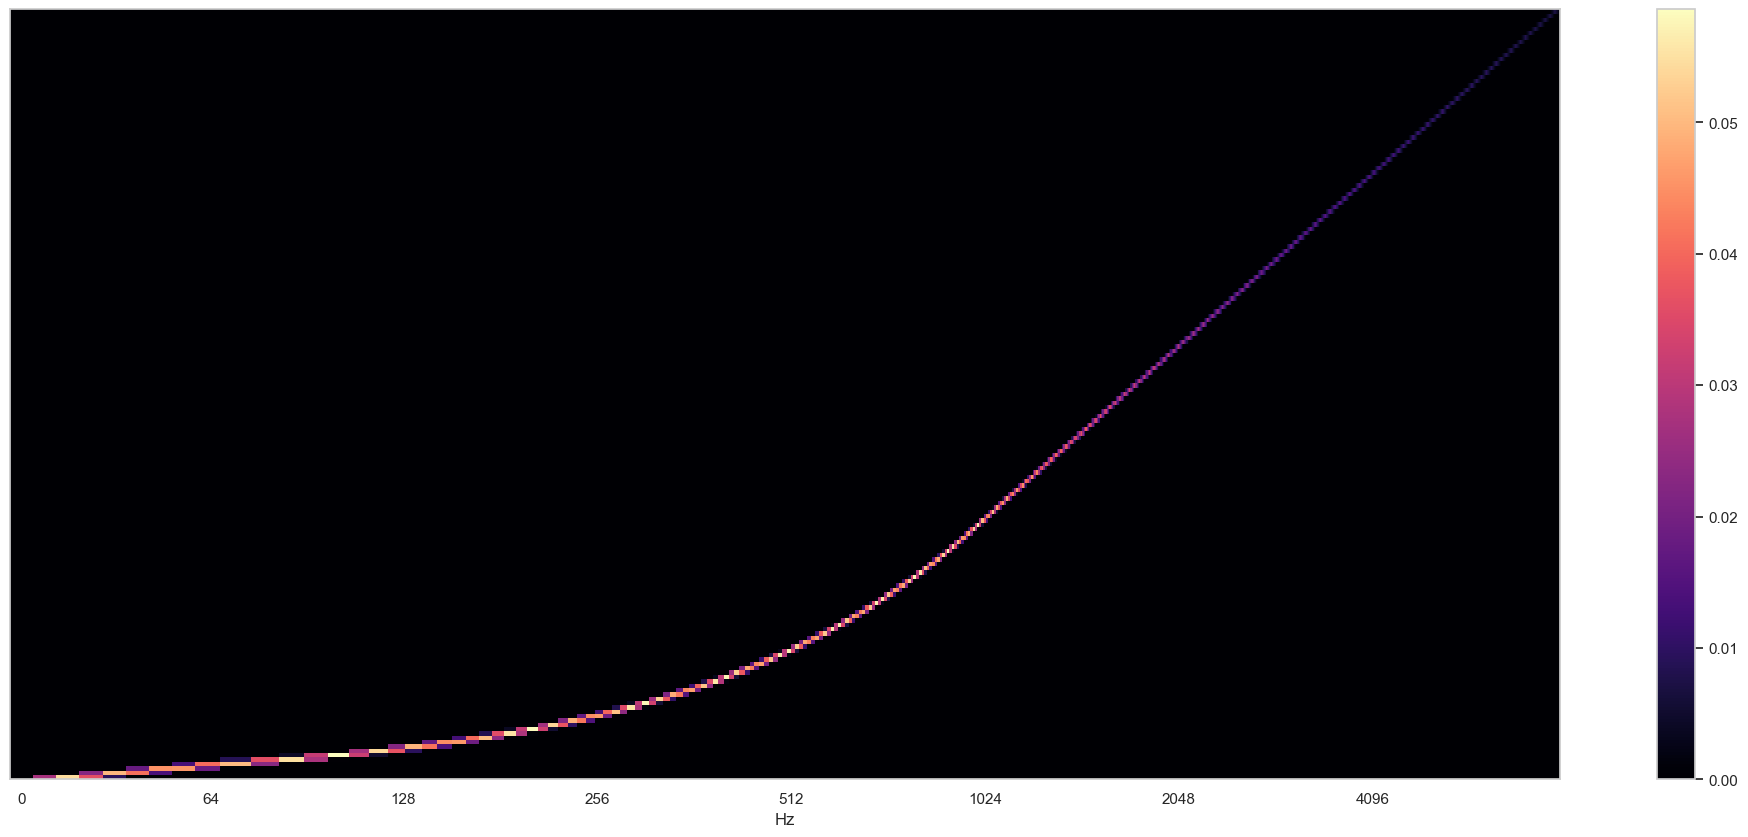

In [21]:
#Visualise Mel-filter banks (log)
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="log") #Plot frequency bins logarithmically across x-axis for human preceptual
plt.colorbar()
plt.show()

Each block of pixels represent 'one' mel band that curves vertically. It seems the intensity of the audio dips between 1024 Hz and 2048 Hz, giving us a ground range to work with on our Mel-Spectrogram. Here the plot is plotted logarithmically to precieve human hearing and better present the distance difference between frequency bins. Here, we can set the parameters for our Mel-Spectrogram to visualise the effectiveness of it.

## 2.3 Feature Extracton On Mel-Spectrograms

In [22]:
#177 mel bands as it is the cutoff from the audio
#Tweaked to 90 mel bands as it captures enough features

# Store Mel-Spectrogram to a list to prevent overlapping
mel_spectrograms = []

# Loop through each folder 
for fold in tqdm(folds, desc = "[OVERALL PROGRESSION]: "):
    folder_path = os.path.join(dataset_path, fold)
    wav_files = librosa.util.find_files(folder_path, ext='wav')
    
    # Loop through each WAV file in the folder
    # "foldes" from Data visualisation
    for wav_file in tqdm(wav_files, desc = (f"Processing wav at {fold}")):
        bird_folder, bird_name, bird_num = os.path.basename(folder_path), os.path.basename(wav_file).split('.')[0], os.path.basename(wav_file).split('.')[1] 
        bird, sr = librosa.load(wav_file)
        mel_spectrogram = librosa.feature.melspectrogram(y=bird, sr=sr, n_fft=2048, hop_length=512, n_mels= 177)
        # mel_spectrogram is taken in by M_db
        M_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Store mel_spectrogram, subfolders, bird names, and numbers to list
        mel_spectrograms.append([mel_spectrogram, M_db, bird_folder, bird_name, bird_num]) 

[OVERALL PROGRESSION]: 100%|███████████████████████████████████████████████████████████| 46/46 [02:28<00:00,  3.22s/it]


- 177 mel bands as it is the cutoff from the audio. Iterations will help find optimal mel bands
- Tweaked to Mel-Spectrogram features will be required later
- A faster approach should be investigated (Threaded / multiprocessing)

In [23]:
#Check shape (Number of mel bands, Number of time frames we extracted)
mel_spectrogram.shape

(177, 130)

In [4]:
print(mel_spectrogram)

NameError: name 'mel_spectrogram' is not defined

This shows us the shape of our Mel-Spectrogram; number of Mel bands (Rows), seperated by time frame (Columns)

## 2.4 Mel-Spectrogram Visualisation

#Loop through Mel-Spectrograms. Unfortunately, the number ordering is based on index postioning over value.

#Iterate through Mel-Spectrogram and subfolders
for mel_spectrogram, M_db, bird_folder, bird_name, bird_num in tqdm(mel_spectrograms, desc="[OVERALL PROGRESSION]: "):
    plt.figure(figsize=(12,4))
    image = librosa.display.specshow(M_db,        
                                     x_axis="time",
                                     y_axis="mel",
                                     sr=sr)
    plt.title(f"{bird_name} / {bird_num} ({bird_folder})")
    plt.colorbar(format="%2.f dB") 
    plt.show()
    plt.close()

# directory to save the JPEG images
output_directory = r'C:\Users\leeju\BirdProject\mel_spec_jpg'
os.makedirs(output_directory, exist_ok=True)

# Assign total mel-spectrograms for progression analysis
# Assign file processed as integer
# Assign batch increments for processing 10 at a time. Memmory issue is bond and need to investigate
total_files = len(mel_spectrograms)
files_processed = 0
batch_size = 20

# Iterate through each mel-spectrogram by index
for batch_start in range(0, total_files, batch_size):
    batch_end = batch_start + batch_size
    batch = mel_spectrograms[batch_start:batch_end]

    # Go through each mel-spectrogram to extract as jpg
    for mel_spectrogram, M_db, bird_folder, bird_name, bird_num in tqdm(batch, 
                                                                         total=len(batch),
                                                                         desc=f"[PROGRESS]: {files_processed}/{total_files}"):
        plt.figure(figsize=(12, 4))
        image = librosa.display.specshow(M_db,        
                                         x_axis="time",
                                         y_axis="mel",
                                         sr=sr)
        plt.title(f"{bird_name} / {bird_num} ({bird_folder})")
        plt.colorbar(format="%2.f dB") 
        plt.savefig(os.path.join(output_directory, f"{bird_name}_{bird_num}.jpg"), format='jpeg', bbox_inches='tight')
        plt.close()
        
        # gc to collect unneeded data every 5 cycle (100 batches)
        gc.set_threshold(5)

        #files_processed = [x] + 1
        files_processed += 1

Mel-Spectrogram is obtained by converting the audio signal into small segments to perform Fourier transformation (FFT) on each time frame. After that, the frequency reults are mapped on to a matrix for digital representation. Each elements corresponds to the sound energy of a specific frequency bin within a time frame. The colour intensity is represented by the loundness of the sound energy. Mel-Spectrogram visualisation is crucial for analysing bird species based on call. 

- Row = Mel Scale (or Frequency Bins) 
- Columns = Time frame of audio signal

This matrix can be visualised like this:

```
[[n1 n2 n3 ... n]
 [m1 m2 m3 ... m]
 [b1 b1 b3 ... b]
 ... ... ... ...
 [v1 v2 v3 ... v]]
 ```
 
 - Double bracket encapsulates the while matrix
 - The ROW of element (i.e [n1 n2 n3 ...]) represent value of Mel-scaled frequency bins arcoss the time frame
 - The element VALUE (i.e n1, n2, n3, etc) represent magnitude (loudness) of the frequency bins. 
 
Mel-Spectrogram reduces the frequency range which makes processing much easier. 
Our first model took in these 1 dimensional array matrixes as input for the CNN model.
We will be directing in using 2D representation of Mel-Spectrogram array as the input for our CNN model.